**##HW01-1##**

In [2]:
import numpy as np
import timeit
import scipy
from scipy.special import zeta, polygamma, factorial
from scipy.special import gamma, factorial
import matplotlib.pyplot as plt

In [2]:

def calculate_pi_naive(N):
    dx = 2. / N
    area=0
    for i in range(N):
        x = -1 + i*dx
        y = np.sqrt(1. - x**2)
        area += dx*y
    return 2*area

def calculate_pi_sum(N):
    xx = np.linspace(-1,1,N)
    circ = lambda x: np.sqrt(1.-x**2)
    hh = circ(xx)
    dx = 2. / (N-1)
    return 2*sum(hh)*dx

def calculate_pi_npsum(N):
    xx = np.linspace(-1,1,N)
    circ = lambda x: np.sqrt(1.-x**2)
    hh = circ(xx)
    dx = 2. / (N-1)
    return 2*np.sum(hh)*dx

In [83]:
pi_1_1= calculate_pi_naive(N=10000)
print("for_loop_pi(N=10000):",pi_1_1)
pi_2 = calculate_pi_sum(N=10000)
print("default_sum_pi(N=10000):",pi_2)
pi_3 = calculate_pi_npsum(N=10000)
print("numpy_sum_pi(N=10000):",pi_3)

pi_1_2= calculate_pi_naive(N=100000)
print(pi_1_2)
pi_1_3= calculate_pi_naive(N=1000000)
print(pi_1_3)




for_loop_pi(N=10000): 3.141589327430582
default_sum_pi(N=10000): 3.1415893269315984
numpy_sum_pi(N=10000): 3.1415893269315975
3.1415925484068445
3.141592650263455


In [4]:
%timeit calculate_pi_naive(N=10000)

10.3 ms ± 261 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
%timeit calculate_pi_sum(N=10000)

794 µs ± 5.09 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [6]:
%timeit calculate_pi_npsum(N=10000)

74.9 µs ± 856 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


**##HW01-2##**

$$ u = \frac{hv}{KT} $$
$$ c1 = \frac{2\pi h}{c^2} = 4.63 \times 10^{-50} $$
$$ c2 = (\frac{K}{h})^4 = 1.94 \times 10^{39} $$
$$ T=6000(K)$$
$$ all \ in \ SI \ units $$

In [43]:
import scipy
from scipy.special import zeta, polygamma, factorial
from scipy.special import gamma, factorial

c1 = 4.63*10**(-50)
c2 = 1.94*10**(41)

result=c1*c2*zeta(4)*gamma(4)
print(result)

5.8329862499041103e-08


**##HW01-3##**

$F_{drag} = -K\eta v  \\
 m = 5 (kg),\ K = 6 \pi R,\ R = 0.3 (m) \\
\eta_{air} = 2 \times 10^{-4} ; \eta_{water} = 0.01 \\
Target = (x_f,y_f) = (20,0)\\
u=initial\_velocity\\
g = 9.8\\
all\_in\_kms\\
Solution:\\
air\\
(v_{o2}, \theta_{2})=(15.3,30)\\
(x_f,y_f)=(20.05,0.014)\\
(v_{o1},\theta_{1})=(25,80)\\
(x_f,y_f)=(20.21,0.0489)\\
water\\
(v_{o1},\theta_{1})=(29,30)\\
(x_f,y_f)=(19.98,0.064)\\
(v_{o2}, \theta_{2})=(132,80)\\
(x_f,y_f)=(20.03,0.0773)$

20.210720261490856
0.04896027842116832


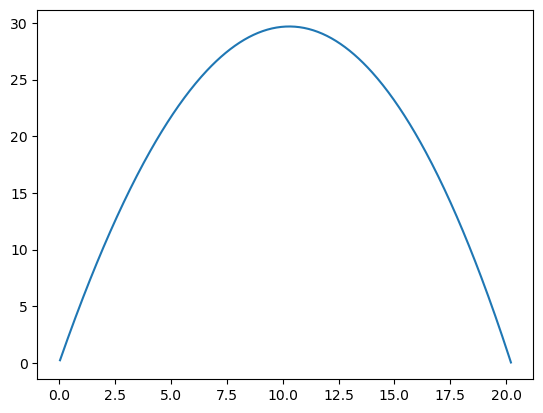

In [42]:
import matplotlib.pyplot as plt
u = 25 #初速度
a = 80*((np.pi)/180) #theta
dt = 0.01  #時間的間隔 也就是euler method 中的 delta t
m = 5
g = 9.8
r = 0.3
k = 6*np.pi*r
eta_air = 2*10**(-4)
T=1000 ##T是總共時間的演進，因此我們要設的較長，以確保能畫出完整的運動，多餘的部分後續再做刪除，

####eta air 空氣中的運動軌跡
def x_Time(T):
    x_0 = 0
    x_1 = u*np.cos(a) #x_1=dx/dt  etc..
    xf=[]
    for t in np.arange(0,T,dt):
        x_1 = x_1 - k*eta_air*x_1/m
        x_0 = x_0 + x_1*dt
        xf.append(x_0)
    return xf


def y_Time(T):
    y_0 = 0 
    y_1 = u*np.sin(a)
    yf=[]
    for t in np.arange(0,T,dt):
        y_1 = y_1 - g*dt - k*eta_air*y_1/m
        #y_1=dy/dt etc..
        y_0 = y_0 + y_1*dt
        yf.append(y_0)
    return yf


xx = x_Time(T)
yy = y_Time(T)
yy=np.array(yy)
xx=np.array(xx)
#將List轉換成array以方便進行資料處理
yy=yy[yy>=0]
#將不合理的數據刪除，y<0 的部分刪除
xx=xx[0:yy.size]
#因為函數1對1 所以取yy的長度

# print(xx.size)
# print(yy.size)
print(xx[-1])
#落地時的x座標
print(yy[-1])
#落地時的y座標，理論上為趨近0

plt.plot(xx,yy)
plt.legend
plt.show()
#繪製運動軌跡





20.037890194786645
0.07737076122815736


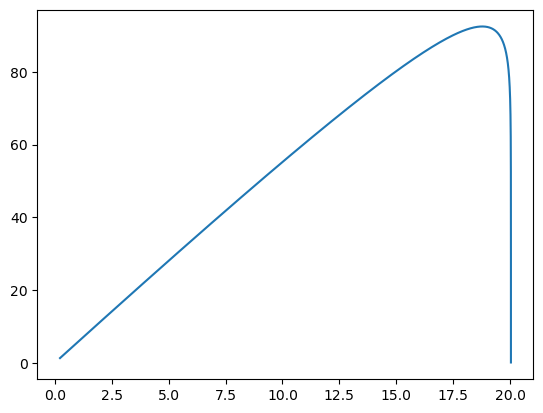

In [43]:
####eta water 水中的運動軌跡
u = 132
eta_air = eta_water = 10**(-2)

xx = x_Time(T)
yy = y_Time(T)
yy=np.array(yy)
xx=np.array(xx)
#將List轉換成array以方便進行資料處理
yy=yy[yy>=0]
#將不合理的數據刪除，y<0 的部分刪除
xx=xx[0:yy.size]
#因為函數1對1 所以取yy的長度

# print(xx.size)
# print(yy.size)
print(xx[-1])
#落地時的x座標
print(yy[-1])
#落地時的y座標，理論上為趨近0

plt.plot(xx,yy)
plt.legend
plt.show()
#繪製運動軌跡
